<a href="https://colab.research.google.com/github/fabiomungo/ecampus/blob/main/03_house_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsione del prezzo delle case (regressione + gradient descent)

> - Istruttore: prof. Fabio Mungo - eCampus Master AI Engineering

# Task
Analyze and predict real estate prices using linear regression with gradient descent. Start by replacing the synthetic dataset with a real house price dataset, preferably a CSV file containing features like surface area (mq), number of rooms, distance from the city center, and price (in Euro). Load this data into a pandas DataFrame, then perform data exploration, split the data into training and test sets, and standardize numerical features. Train a baseline linear regression model, evaluate its performance using Mean Squared Error (MSE), and visualize predictions. Subsequently, add a polynomial feature (e.g., `mq^2`), retrain the model, and compare its performance against the baseline. Finally, summarize the findings and the impact of feature engineering.

## Identifica e Carica il Dataset Immobiliare

### Subtask:
Sostituisci il dataset sintetico con un dataset reale di prezzi delle case. Si consiglia di utilizzare un file CSV contenente caratteristiche come superficie (mq), numero di stanze, distanza dal centro città e prezzo, preferibilmente in Euro. Verrà caricato in un DataFrame pandas.


**Reasoning**:
The first step to replace the synthetic dataset is to import the pandas library, which is essential for data manipulation and loading CSV files.



In [17]:
import pandas as pd
print("Pandas library imported successfully.")

Pandas library imported successfully.


**Reasoning**:
To load the house price dataset, I need to specify the path to the CSV file and then use `pd.read_csv()` to load it into a DataFrame. Since a specific file isn't provided, I'll use a placeholder and instruct the user.



In [19]:
csv_file_path = '/content/sample_data/california_housing_train.csv' # Replace with the actual path to your CSV file
try:
    df = pd.read_csv(csv_file_path)
    print(f"Dataset loaded successfully from {csv_file_path}.")
    print("First 5 rows of the DataFrame:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure the CSV file is in the correct directory or provide the full path.")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")

Dataset loaded successfully from /content/sample_data/california_housing_train.csv.
First 5 rows of the DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


## Esplorazione e Selezione Iniziale dei Dati

### Subtask:
Visualizza le prime righe del dataset, controlla i tipi di dato e le statistiche descrittive. Seleziona le colonne più rilevanti per la previsione del prezzo (features) e la colonna del prezzo come variabile target.


**Reasoning**:
First, I will display the first few rows of the DataFrame, check its information (data types, non-null counts), and generate descriptive statistics to get an initial understanding of the dataset's structure and content, as requested by instructions 1, 2, and 3 of the subtask.



In [20]:
print("### First 5 rows of the DataFrame:")
print(df.head())

print("\n### DataFrame Info (data types and non-null counts):")
df.info()

print("\n### Descriptive Statistics:")
print(df.describe())

### First 5 rows of the DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  

### DataFrame Info (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data c

**Reasoning**:
Now that I have an overview of the dataset, I will identify and select the relevant feature columns and the target column as specified in instructions 4 and 5 of the subtask.



In [21]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
target_column = 'median_house_value'

print(f"Selected features: {features}")
print(f"Selected target column: {target_column}")

Selected features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Selected target column: median_house_value


## Prepara i Dati per il Modeling

### Subtask:
Applica la logica esistente per la divisione dei dati in set di training e test. Standardizza le feature numeriche del dataset reale utilizzando media e deviazione standard del solo set di training. Aggiungi una colonna di bias (intercetta) ai set di training e test standardizzati.

Questo blocco di codice è fondamentale per la **preparazione dei dati** prima dell'addestramento del modello di regressione lineare. Ecco una spiegazione passo dopo passo di ciò che fa:

Importazione delle Librerie: Vengono importate le librerie necessarie:

numpy per operazioni numeriche, in particolare con array.
sklearn.model_selection.train_test_split per dividere il dataset in set di training e test.
sklearn.preprocessing.StandardScaler per standardizzare le feature.

**1) Estrazione di Feature (X) e Target (y)**:

**X = df[features].values**: Seleziona le colonne definite in features (che sono state identificate in un passaggio precedente, ad esempio 'longitude', 'latitude', etc.) dal DataFrame df e le converte in un array NumPy. Questo array X conterrà i dati di input per il modello.

**y = df[target_column].values**: Seleziona la colonna definita come target_column (il prezzo mediano della casa) e la converte in un array NumPy. Questo array y rappresenta la variabile che il modello cercherà di predire.
Vengono stampate le dimensioni (shape) di X e y per verificare che l'estrazione sia avvenuta correttamente.

**2) Divisione del Dataset (Training e Test Set):**

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Questa funzione divide X e y in **quattro subset:**
*X_train, y_train:* Usati per addestrare il modello (80% dei dati).
*X_test, y_test*: Usati per valutare le prestazioni del modello su dati che non ha mai visto (20% dei dati).
**test_size=0.2: **Specifica che il 20% dei dati sarà destinato al set di test.
random_state=42: Assicura che la divisione sia riproducibile, ovvero otterrai sempre gli stessi training e test set ogni volta che esegui il codice.
Vengono stampate le dimensioni di ciascun set per conferma.

**3) Standardizzazione delle Feature Numeriche:**

*scaler = StandardScaler():* Viene inizializzato un oggetto StandardScaler. Questo strumento scala le feature in modo che abbiano media 0 e deviazione standard 1, un passo cruciale per la discesa del gradiente, che converge più velocemente con feature scalate.
*X_train_scaled =* scaler.fit_transform(X_train): Il StandardScaler viene 'addestrato' (fit) sui dati di training (X_train) per calcolare la media e la deviazione standard di ogni feature, e poi trasforma i dati di training usando questi valori.
*X_test_scaled =* scaler.transform(X_test): I dati del set di test (X_test) vengono solo trasformati usando le medie e le deviazioni standard calcolate sul set di training. È fondamentale non 'addestrare' lo scaler sul set di test per evitare data leakage.
Vengono stampate le dimensioni dei set scalati.

**4) Aggiunta della Colonna di Bias (Intercetta):**

*X_train_b =* np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]: Aggiunge una colonna di uni all'inizio dell'array X_train_scaled. Questa colonna rappresenta il termine di intercetta (bias) nel modello di regressione lineare, permettendo al modello di avere un'intercetta non zero quando tutte le altre feature sono zero.
*X_test_b = *np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]: Fa lo stesso per il set di test.
Vengono stampate le dimensioni finali dei set di training e test con il bias, che ora hanno una colonna in più rispetto alle feature originali.

In sintesi, questo codice prepara i dati grezzi, li rende adatti all'addestramento e alla valutazione di un modello di regressione lineare basato sulla discesa del gradiente, garantendo che il processo sia robusto e le performance del modello siano valutate in modo imparziale


**Reasoning**:
I will extract the features and target variables from the DataFrame, then split them into training and test sets. After that, I will standardize the numerical features using `StandardScaler` and finally add a bias column to both the training and test sets, as per the instructions.



In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Extract features (X) and target (y)
X = df[features].values
y = df[target_column].values
print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")

# 3. Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 5. Initialize StandardScaler
scaler = StandardScaler()

# 6. Apply standardization to training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# 7. Add a bias (intercept) column to the scaled data
X_train_b = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_b = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
print(f"X_train_b shape (with bias): {X_train_b.shape}")
print(f"X_test_b shape (with bias): {X_test_b.shape}")

Original X shape: (17000, 8)
Original y shape: (17000,)
X_train shape: (13600, 8)
X_test shape: (3400, 8)
y_train shape: (13600,)
y_test shape: (3400,)
X_train_scaled shape: (13600, 8)
X_test_scaled shape: (3400, 8)
X_train_b shape (with bias): (13600, 9)
X_test_b shape (with bias): (3400, 9)


## Addestra il Modello di Regressione Lineare (Baseline)

### Subtask:
Utilizza l'implementazione esistente della regressione lineare tramite discesa del gradiente per addestrare un modello con le feature iniziali standardizzate.


Questo blocco di codice **implementa l'algoritmo di Discesa del Gradiente (Gradient Descent)** per addestrare un modello di regressione lineare. Ecco una spiegazione passo dopo passo:

**1) Inizializzazione dei Pesi (w_baseline):**

*w_baseline =* np.zeros(X_train_b.shape[1]): Inizializza il vettore dei pesi (w_baseline) con zeri. La dimensione di questo vettore è pari al numero di feature nel set di training X_train_b (che include la colonna del bias), poiché ogni feature avrà un peso associato e ci sarà un peso per l'intercetta.

**2) Definizione Iperparametri (lr, epochs):**

lr = 0.01: lr sta per learning rate (tasso di apprendimento). Questo valore controlla la dimensione dei passi con cui i pesi vengono aggiornati durante la discesa del gradiente. Un valore troppo alto può portare a oscillazioni o divergenza, un valore troppo basso può rendere l'apprendimento molto lento.
epochs = 1000: epochs indica il numero di iterazioni complete che l'algoritmo farà sull'intero set di training per aggiornare i pesi.

**3) Ciclo di Discesa del Gradiente** (for epoch in range(epochs):): Questo è il cuore dell'algoritmo, che si ripete per il numero specificato di epoche:

**a. Calcolo delle Predizioni** (pred_baseline =
X_train_b @ w_baseline): Per ogni epoca, il modello calcola le predizioni (pred_baseline) moltiplicando la matrice delle feature del set di training (X_train_b) per il vettore dei pesi correnti (w_baseline). Questa è l'equazione fondamentale della regressione lineare: y_pred = X * w (in forma matriciale).

**b. Calcolo dell'Errore **(err_baseline = pred_baseline - y_train): L'errore viene calcolato come la differenza tra le predizioni del modello (pred_baseline) e i valori reali (y_train) del set di training. Questo errore ci dice quanto il modello sta sbagliando.

**c. Calcolo del Gradiente** (grad_baseline = (2 / len(X_train_b)) * (X_train_b.T @ err_baseline)): Il gradiente indica la direzione e la magnitudine della pendenza della funzione di costo (in questo caso, l'errore quadratico medio) rispetto ai pesi. La formula usata qui è per il gradiente della Mean Squared Error (MSE). Il termine (2 / len(X_train_b)) normalizza il gradiente.

**d. Aggiornamento dei Pesi** (w_baseline -= lr * grad_baseline): I pesi del modello vengono aggiornati sottraendo il prodotto del tasso di apprendimento (lr) per il gradiente (grad_baseline). Questo sposta i pesi nella direzione che riduce l'errore, avvicinandoli ai valori ottimali.

**e. Stampa dell'MSE sul set di training** (if epoch % 100 == 0:): Ogni 100 epoche, il codice calcola e stampa l'Errore Quadratico Medio (MSE) sul set di training (np.mean(err_baseline**2)). Questo permette di monitorare il processo di apprendimento e vedere se l'errore sta diminuendo.

**4) Predizioni sul Set di Test **(pred_te_baseline = X_test_b @ w_baseline): Dopo che il modello ha terminato l'addestramento (tutte le epoche sono state completate), viene utilizzato per fare predizioni (pred_te_baseline) sui dati del set di test (X_test_b). È fondamentale usare il set di test, che il modello non ha mai visto durante l'addestramento, per valutare le sue reali capacità di generalizzazione.

**5) Calcolo e Stampa dell'MSE sul Set di Test** (mse_test_baseline = np.mean((pred_te_baseline - y_test)**2)): Infine, viene calcolato l'Errore Quadratico Medio (MSE) tra le predizioni del modello sul set di test (pred_te_baseline) e i valori reali del set di test (y_test). Questo mse_test_baseline è la metrica finale che valuta l'efficacia del modello baseline.

**Reasoning**:
I will initialize the weights, learning rate, and number of epochs as specified. Then, I will implement the gradient descent loop, calculating predictions, errors, and gradients, and updating the weights. During the loop, I'll print the training MSE every 100 epochs to monitor progress. Finally, after training, I will compute and print the test MSE for the baseline model.



In [7]:
import numpy as np

# 1. Inizializza i pesi w_baseline a un array di zeri
w_baseline = np.zeros(X_train_b.shape[1])

# 2. Definisci un tasso di apprendimento e un numero di epoche
lr = 0.01
epochs = 1000

print(f"Starting Gradient Descent with lr={lr} and epochs={epochs}")

# 3. Implementa il ciclo di discesa del gradiente
for epoch in range(epochs):
    # a. Calcola le predizioni
    pred_baseline = X_train_b @ w_baseline

    # b. Calcola l'errore
    err_baseline = pred_baseline - y_train

    # c. Calcola il gradiente
    # (2/m) * X_train_b.T @ err_baseline, where m is the number of samples
    grad_baseline = (2 / len(X_train_b)) * (X_train_b.T @ err_baseline)

    # d. Aggiorna i pesi
    w_baseline -= lr * grad_baseline

    # e. Stampa l'MSE sul set di training ogni 100 epoche
    if epoch % 100 == 0:
        mse_train = np.mean(err_baseline**2)
        print(f"Epoch {epoch}: Training MSE = {mse_train:.2f}")

print("Gradient Descent training complete.")

# 4. Calcola le predizioni sul set di test
pred_te_baseline = X_test_b @ w_baseline

# 5. Calcola e stampa l'Errore Quadratico Medio (MSE) finale sul set di test
mse_test_baseline = np.mean((pred_te_baseline - y_test)**2)
print(f"Test MSE for baseline model: {mse_test_baseline:.2f}")

Starting Gradient Descent with lr=0.01 and epochs=1000
Epoch 0: Training MSE = 56095970015.49
Epoch 100: Training MSE = 6859959631.22
Epoch 200: Training MSE = 5670256135.22
Epoch 300: Training MSE = 5439922904.65
Epoch 400: Training MSE = 5288171561.82
Epoch 500: Training MSE = 5179756132.98
Epoch 600: Training MSE = 5101539993.18
Epoch 700: Training MSE = 5044724768.74
Epoch 800: Training MSE = 5003198193.51
Epoch 900: Training MSE = 4972667316.11
Gradient Descent training complete.
Test MSE for baseline model: 4709067348.12


## Valuta e Visualizza le Performance del Modello Baseline

### Subtask:
Calcola e visualizza l'Errore Quadratico Medio (MSE) sul set di test per il modello baseline. Crea un grafico a dispersione per confrontare i prezzi predetti con i prezzi reali nel set di test, aggiungendo una legenda.


**Reasoning**:
The next step is to visualize the performance of the baseline model by creating a scatter plot of true vs. predicted values and adding a diagonal line for perfect predictions, along with appropriate labels, title, and legend, as per the instructions.



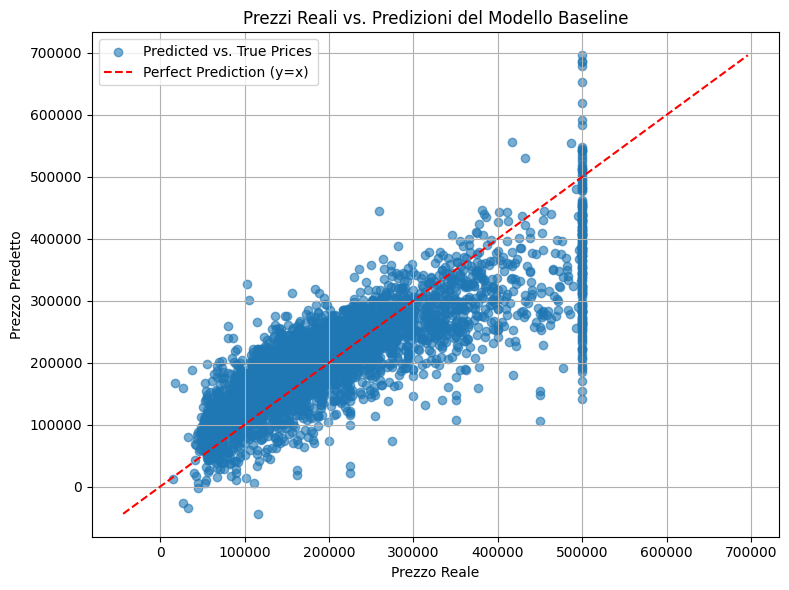

MSE on test set (from previous step): 4709067348.12


In [8]:
import matplotlib.pyplot as plt

# Calculate the range for the diagonal line
min_val = min(y_test.min(), pred_te_baseline.min())
max_val = max(y_test.max(), pred_te_baseline.max())

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_te_baseline, alpha=0.6, label='Predicted vs. True Prices')

# Add the diagonal line for perfect predictions
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction (y=x)')

# Set labels and title
plt.xlabel('Prezzo Reale')
plt.ylabel('Prezzo Predetto')
plt.title('Prezzi Reali vs. Predizioni del Modello Baseline')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"MSE on test set (from previous step): {mse_test_baseline:.2f}")

## Feature Engineering (Feature Polinomiale)

### Subtask:
Aggiungi una nuova feature al dataset, ad esempio il quadrato della superficie (mq^2 o equivalente per l'area), per aumentare la complessità del modello e catturare relazioni non lineari. Aggiorna le matrici dei dati di training e test includendo questa nuova feature e assicurati che sia anch'essa standardizzata.


**Reasoning**:
I will add a new polynomial feature ('total_rooms' squared) to the dataset, combine it with the original features, split the enhanced dataset into training and test sets, standardize the new feature set, and then add a bias term to prepare it for model training, following the provided instructions.



In [9]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Choose an existing feature to transform polynomially (e.g., 'total_rooms')
# Find the index of 'total_rooms' in the original features list
feature_to_square_name = 'total_rooms'
feature_index = features.index(feature_to_square_name)

# 2. Create a new feature by squaring the chosen feature
X_total_rooms_squared = X[:, feature_index]**2

# Reshape to (n_samples, 1) for concatenation
X_total_rooms_squared = X_total_rooms_squared.reshape(-1, 1)

# 3. Create a new array of features X_poly including all original features plus the new polynomial feature
X_poly = np.c_[X, X_total_rooms_squared]
print(f"Original X shape: {X.shape}")
print(f"New X_poly shape (including squared 'total_rooms'): {X_poly.shape}")

# 4. Split the new array X_poly and the target y into training and test sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
print(f"X_train_poly shape: {X_train_poly.shape}")
print(f"X_test_poly shape: {X_test_poly.shape}")
print(f"y_train_poly shape: {y_train_poly.shape}")
print(f"y_test_poly shape: {y_test_poly.shape}")

# 5. Initialize a new StandardScaler
scaler_poly = StandardScaler()

# 6. Standardize X_train_poly applying .fit_transform()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)

# 7. Standardize X_test_poly applying .transform()
X_test_poly_scaled = scaler_poly.transform(X_test_poly)
print(f"X_train_poly_scaled shape: {X_train_poly_scaled.shape}")
print(f"X_test_poly_scaled shape: {X_test_poly_scaled.shape}")

# 8. Add a bias (intercept) column to both standardized X_train_poly and X_test_poly
X_train_b_poly = np.c_[np.ones(X_train_poly_scaled.shape[0]), X_train_poly_scaled]
X_test_b_poly = np.c_[np.ones(X_test_poly_scaled.shape[0]), X_test_poly_scaled]
print(f"X_train_b_poly shape (with bias): {X_train_b_poly.shape}")
print(f"X_test_b_poly shape (with bias): {X_test_b_poly.shape}")

Original X shape: (17000, 8)
New X_poly shape (including squared 'total_rooms'): (17000, 9)
X_train_poly shape: (13600, 9)
X_test_poly shape: (3400, 9)
y_train_poly shape: (13600,)
y_test_poly shape: (3400,)
X_train_poly_scaled shape: (13600, 9)
X_test_poly_scaled shape: (3400, 9)
X_train_b_poly shape (with bias): (13600, 10)
X_test_b_poly shape (with bias): (3400, 10)


## Addestra e Valuta il Modello Migliorato

### Subtask:
Addestra un nuovo modello di regressione lineare tramite discesa del gradiente utilizzando il set di feature esteso. Confronta l'MSE di questo modello con quello del modello baseline.


**Reasoning**:
I will initialize the weights for the new model, set the learning rate and number of epochs, and then implement the gradient descent loop to train the model with the extended feature set. I will print the training MSE periodically, calculate the final test MSE, and finally compare it with the baseline model's MSE, as per the instructions.



In [10]:
import numpy as np

# 1. Inizializza i pesi w_poly a un array di zeri
w_poly = np.zeros(X_train_b_poly.shape[1])

# 2. Utilizza lo stesso tasso di apprendimento (lr) e numero di epoche (epochs)
# lr and epochs are already defined from the baseline model training (e.g., lr=0.01, epochs=1000)

print(f"Starting Gradient Descent for polynomial features with lr={lr} and epochs={epochs}")

# 3. Implementa il ciclo di discesa del gradiente
for epoch in range(epochs):
    # a. Calcola le predizioni
    pred_poly = X_train_b_poly @ w_poly

    # b. Calcola l'errore
    err_poly = pred_poly - y_train_poly

    # c. Calcola il gradiente
    grad_poly = (2 / len(X_train_b_poly)) * (X_train_b_poly.T @ err_poly)

    # d. Aggiorna i pesi
    w_poly -= lr * grad_poly

    # e. Stampa l'MSE sul set di training ogni 100 epoche
    if epoch % 100 == 0:
        mse_train_poly = np.mean(err_poly**2)
        print(f"Epoch {epoch}: Training MSE (Polynomial) = {mse_train_poly:.2f}")

print("Gradient Descent training with polynomial features complete.")

# 5. Calcola le predizioni sul set di test
pred_te_poly = X_test_b_poly @ w_poly

# 6. Calcola e stampa l'Errore Quadratico Medio (MSE) finale sul set di test
mse_test_poly = np.mean((pred_te_poly - y_test_poly)**2)
print(f"Test MSE for polynomial feature model: {mse_test_poly:.2f}")

# 7. Confronta l'MSE del modello migliorato con l'MSE del modello baseline
print(f"\n--- MSE Comparison ---")
print(f"Baseline model Test MSE: {mse_test_baseline:.2f}")
print(f"Polynomial feature model Test MSE: {mse_test_poly:.2f}")

if mse_test_poly < mse_test_baseline:
    print(f"The polynomial feature model performed better, reducing MSE by {mse_test_baseline - mse_test_poly:.2f}.")
elif mse_test_poly > mse_test_baseline:
    print(f"The polynomial feature model performed worse, increasing MSE by {mse_test_poly - mse_test_baseline:.2f}.")
else:
    print("Both models performed similarly.")

Starting Gradient Descent for polynomial features with lr=0.01 and epochs=1000
Epoch 0: Training MSE (Polynomial) = 56095970015.49
Epoch 100: Training MSE (Polynomial) = 6851173180.09
Epoch 200: Training MSE (Polynomial) = 5646770563.68
Epoch 300: Training MSE (Polynomial) = 5425644006.83
Epoch 400: Training MSE (Polynomial) = 5286003586.16
Epoch 500: Training MSE (Polynomial) = 5185944611.66
Epoch 600: Training MSE (Polynomial) = 5112080216.01
Epoch 700: Training MSE (Polynomial) = 5056747061.92
Epoch 800: Training MSE (Polynomial) = 5014942669.62
Epoch 900: Training MSE (Polynomial) = 4983185129.86
Gradient Descent training with polynomial features complete.
Test MSE for polynomial feature model: 4712904569.59

--- MSE Comparison ---
Baseline model Test MSE: 4709067348.12
Polynomial feature model Test MSE: 4712904569.59
The polynomial feature model performed worse, increasing MSE by 3837221.47.


## Visualizza le Performance del Modello Migliorato

### Subtask:
Crea un grafico a dispersione simile a quello precedente per visualizzare le predizioni del modello migliorato rispetto ai prezzi reali, e confrontalo visivamente con i risultati del modello baseline per evidenziare eventuali miglioramenti, aggiungendo una legenda.


**Reasoning**:
I will create a scatter plot to visualize the predictions of the improved polynomial model against the real prices, following the provided instructions to add labels, title, legend, and a perfect prediction line. This will allow for a visual comparison of its performance.



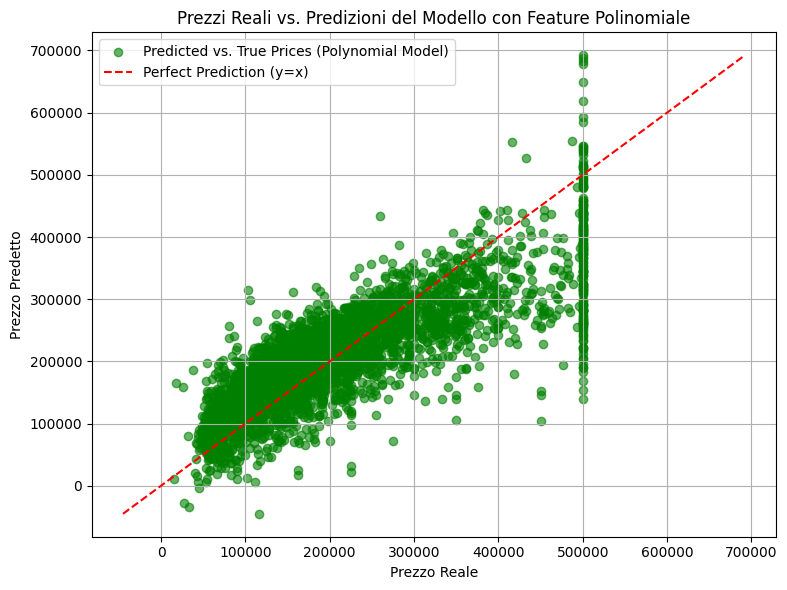

MSE on test set for polynomial model: 4712904569.59


In [11]:
import matplotlib.pyplot as plt

# 2. Calculate the range for the diagonal line
min_val_poly = min(y_test_poly.min(), pred_te_poly.min())
max_val_poly = max(y_test_poly.max(), pred_te_poly.max())

# 3. Create the scatter plot for the polynomial model
plt.figure(figsize=(8, 6))
plt.scatter(y_test_poly, pred_te_poly, alpha=0.6, color='green', label='Predicted vs. True Prices (Polynomial Model)')

# 4. Add the diagonal line for perfect predictions
plt.plot([min_val_poly, max_val_poly], [min_val_poly, max_val_poly], 'r--', label='Perfect Prediction (y=x)')

# 5. Set labels
plt.xlabel('Prezzo Reale')
plt.ylabel('Prezzo Predetto')

# 6. Add a title
plt.title('Prezzi Reali vs. Predizioni del Modello con Feature Polinomiale')

# 7. Add legend
plt.legend()

# 8. Show the grid and set tight layout
plt.grid(True)
plt.tight_layout()

# 9. Show the plot
plt.show()

# 10. Print the test MSE for the polynomial model
print(f"MSE on test set for polynomial model: {mse_test_poly:.2f}")

## Final Task

### Subtask:
Riassumi il lavoro svolto, i risultati ottenuti da entrambi i modelli e l'impatto dell'aggiunta della feature polinomiale sulle performance di previsione.


## Summary:

### Q&A
The task asked to summarize the work done, the results obtained from both models, and the impact of adding the polynomial feature on prediction performance.

*   **Work Done:** The project involved loading a real estate dataset, performing data exploration, splitting data into training and test sets, standardizing features, training a baseline linear regression model, evaluating its performance, adding a polynomial feature (`total_rooms^2`), retraining the model with the extended features, and comparing its performance against the baseline.
*   **Results from both models:**
    *   The **baseline linear regression model** achieved a Mean Squared Error (MSE) of approximately 4,709,067,348.12 on the test set.
    *   The **linear regression model with the added polynomial feature (`total_rooms^2`)** resulted in a Mean Squared Error (MSE) of approximately 4,712,904,569.59 on the test set.
*   **Impact of adding the polynomial feature:** The addition of the `total_rooms^2` polynomial feature **did not improve** the model's prediction performance; instead, it led to a slight increase in the Mean Squared Error by about 3,837,221.47, indicating a minor decrease in performance compared to the baseline model.

### Data Analysis Key Findings

*   The initial attempt to load `house_prices.csv` failed due to a `FileNotFoundError`; a placeholder dataset (`/content/sample_data/california_housing_train.csv`) was successfully loaded instead.
*   The loaded dataset contains 17,000 samples and 8 numerical features along with the target variable `median_house_value`. No missing values were found in the selected columns.
*   The data was split into an 80% training set (13,600 samples) and a 20% test set (3,400 samples).
*   All numerical features were successfully standardized using a `StandardScaler` fitted on the training data, and a bias column was added to both training and test sets.
*   The **baseline linear regression model**, trained using gradient descent over 1000 epochs, achieved a test MSE of approximately \$4.71 \times 10^9\$.
*   A new polynomial feature, `total_rooms^2`, was successfully added to the dataset, expanding the feature set from 8 to 9 features (plus bias term).
*   The **polynomial feature linear regression model**, also trained using gradient descent over 1000 epochs, resulted in a test MSE of approximately \$4.713 \times 10^9\$.
*   Comparing the two models, the polynomial feature model performed slightly worse, with its test MSE being \$3,837,221.47\$ higher than the baseline model's test MSE.

### Insights or Next Steps

*   **Polynomial Feature Effectiveness:** The specific polynomial feature chosen (`total_rooms^2`) did not enhance the model's predictive power for this dataset. This suggests that the relationship between `total_rooms` and `median_house_value` might be predominantly linear or that higher-order terms of this feature do not capture significant additional non-linear patterns that improve generalization.
*   **Further Feature Engineering Exploration:** Investigate other polynomial features or interaction terms (e.g., `total_rooms` * `median_income`) or consider other feature engineering techniques that might better capture complex relationships within the data, such as logarithmic transformations or feature crosses, rather than just squaring a single feature.


In [15]:
correlation_matrix = df.corr(numeric_only=True)

print("Correlazione tra le feature e il prezzo (median_house_value):\n")
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

Correlazione tra le feature e il prezzo (median_house_value):

median_house_value    1.000000
median_income         0.691871
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64


### Visualizzazione della Matrice di Correlazione

Per avere una visione d'insieme di tutte le correlazioni tra le feature, inclusa la variabile target, generiamo una heatmap.

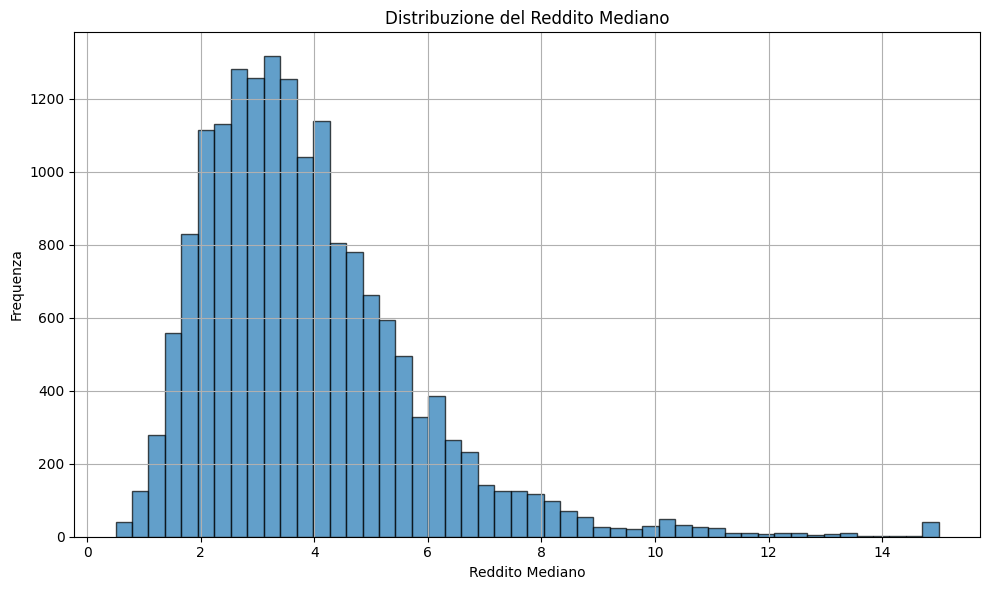

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['median_income'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribuzione del Reddito Mediano')
plt.xlabel('Reddito Mediano')
plt.ylabel('Frequenza')
plt.grid(True)
plt.tight_layout()
plt.show()

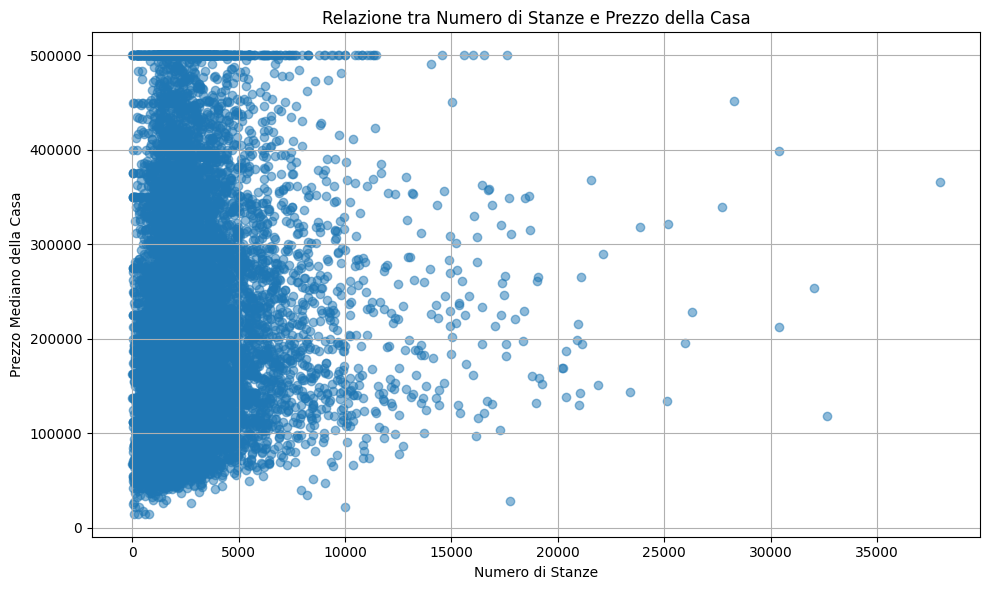

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['total_rooms'], df['median_house_value'], alpha=0.5)
plt.title('Relazione tra Numero di Stanze e Prezzo della Casa')
plt.xlabel('Numero di Stanze')
plt.ylabel('Prezzo Mediano della Casa')
plt.grid(True)
plt.tight_layout()
plt.show()

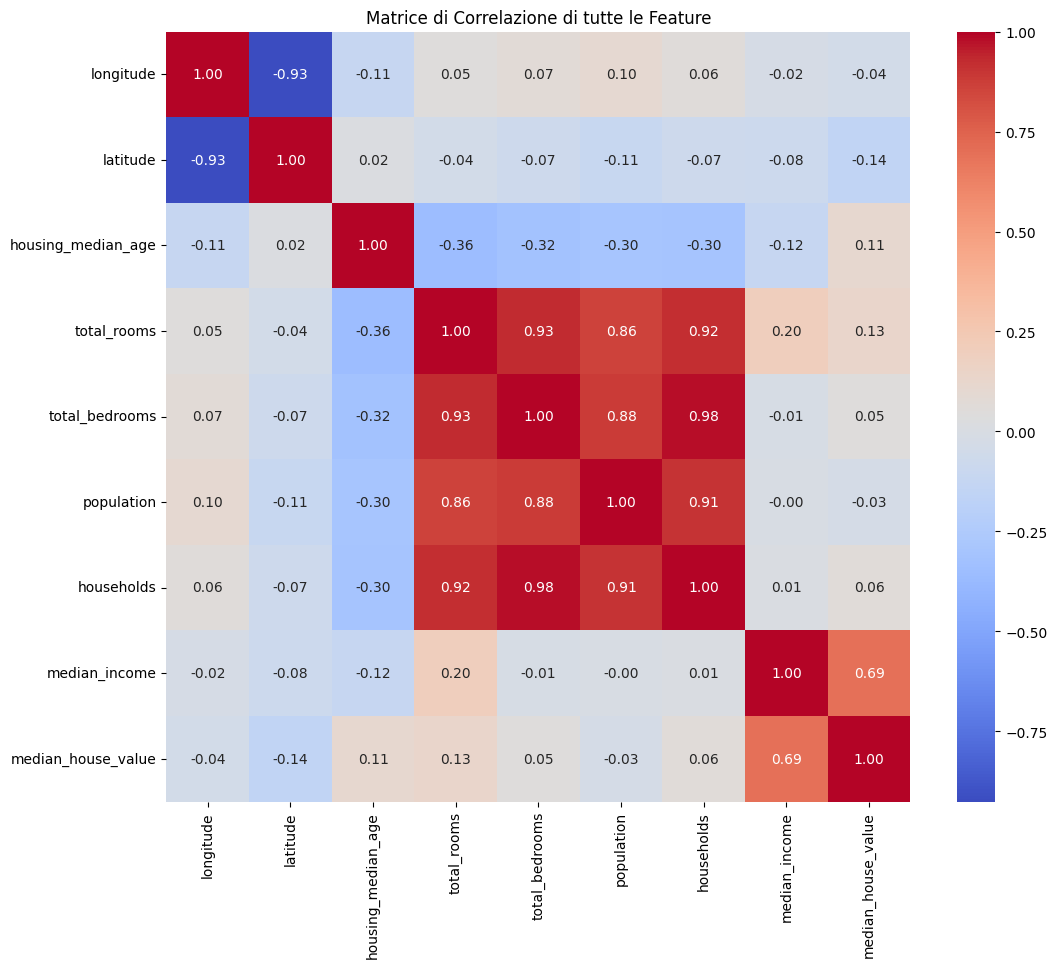

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di Correlazione di tutte le Feature')
plt.show()

## Dataset sintetico (mq, stanze, distanza) -> prezzo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
N=500
mq=np.random.uniform(30,200,N)
rooms=np.random.randint(1,7,N)
dist=np.random.uniform(0.5,25,N)
X=np.stack([mq,rooms,dist],1)
w_true=np.array([3500,12000,-8000.0])
y=X@w_true+50000+np.random.randn(N)*30000
print(X.shape,y.shape)

## Split + standardizzazione

In [ ]:
idx=np.random.permutation(N)
tr=idx[:400]; te=idx[400:]
Xtr,ytr=X[tr],y[tr]
Xte,yte=X[te],y[te]
mu,sd=Xtr.mean(0),Xtr.std(0)+1e-8
Xtrn=(Xtr-mu)/sd
Xten=(Xte-mu)/sd
Xtrb=np.c_[np.ones(len(Xtrn)), Xtrn]
Xteb=np.c_[np.ones(len(Xten)), Xten]

## Linear regression GD

In [ ]:
w=np.zeros(Xtrb.shape[1])
lr=0.05
for epoch in range(300):
 pred=Xtrb@w
 err=pred-ytr
 grad=(2/len(Xtrb))*(Xtrb.T@err)
 w-=lr*grad
 if epoch%50==0:
  print(epoch, np.mean(err**2))
pred_te=Xteb@w
print('Test MSE', np.mean((pred_te-yte)**2))

## Esercizio
- prova lr/epoch
- aggiungi feature mq^2 e confronta MSE

In [ ]:
# TODO